<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/Proyecto%20Final%20ML/%20Entrega%2004%20-%20Model/%20Entrega_04_Model_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###OBTAIN


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

El conjunto de datos contiene un conjunto de 150 registros bajo cinco atributos: longitud del sépalo, ancho del sépalo, largo del pétalo, ancho del pétalo y especie.


Esta es quizás la base de datos más conocida que se encuentra en la literatura de reconocimiento de patrones. El artículo de Fisher es un clásico en el campo y se hace referencia con frecuencia hasta el día de hoy. (Consulte Duda & Hart, por ejemplo). El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris. Una clase es linealmente separable de las otras 2; estos últimos NO son linealmente separables entre sí.

Atributo previsto: clase de planta de iris.

Este es un dominio extremadamente simple.

Estos datos difieren de los datos presentados en el artículo de Fisher (identificado por Steve Chadwick, spchadwick '@' espeedaz.net). La muestra 35 debe ser: 4.9,3.1,1.5,0.2,"Iris-setosa" donde el error está en la cuarta característica. La muestra 38: 4.9,3.6,1.4,0.1,"Iris-setosa" donde los errores están en la segunda y tercera características.

URL (https://archive.ics.uci.edu/ml/datasets/iris)

In [73]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris = pd.read_csv(url, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])

iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
#Checking the dimensions....
iris.shape

(150, 5)

###SCRUB

Comprobación de valores duplicados

In [76]:
print('Duplicados: {}'.format(sum(iris.duplicated())))

Duplicados: 3


Comprobación de valores nulos

In [77]:
print('Tenemos {} valores NaN/Null'.format(iris.isnull().values.sum()))

Tenemos 0 valores NaN/Null


In [78]:
#checking whether a dataset contain a missing value or not/.....
iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [79]:
#Checkig the unique values in species column which is our target variable..
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

###EXPLORE

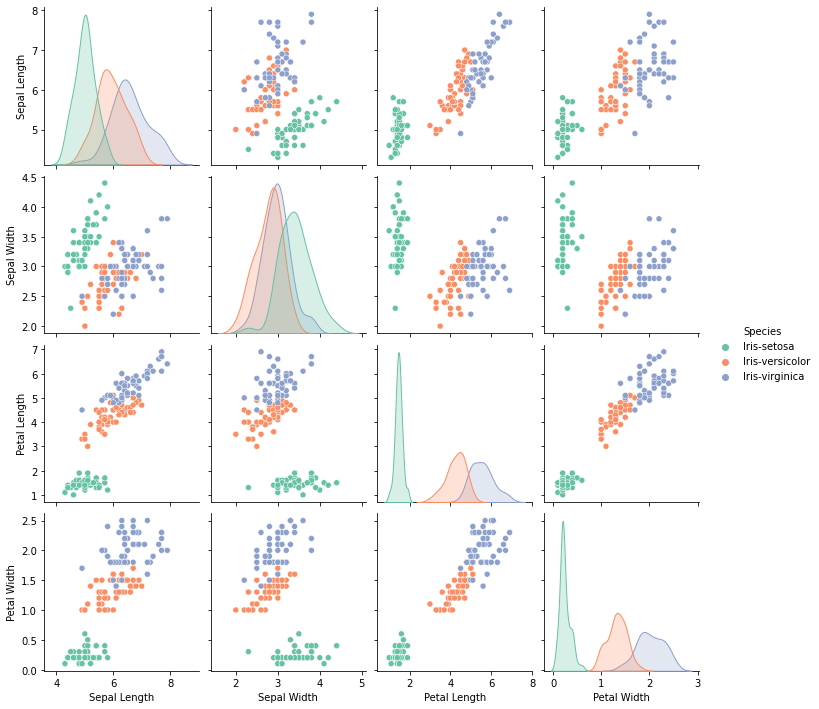

In [80]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(data=iris, hue='Species', palette='Set2')

- Hay 150 observaciones con 4 características cada una (longitud del sépalo, anchura del sépalo, longitud del pétalo, anchura del pétalo).
- No hay valores nulos, por lo que no tenemos que preocuparnos por eso.
- Hay 50 observaciones de cada especie (setosa, versicolor, virginica).

Visualización 1: Longitud del sépalo VS Ancho
- Este gráfico muestra la relación entre la longitud del sépalo y el ancho del sépalo.

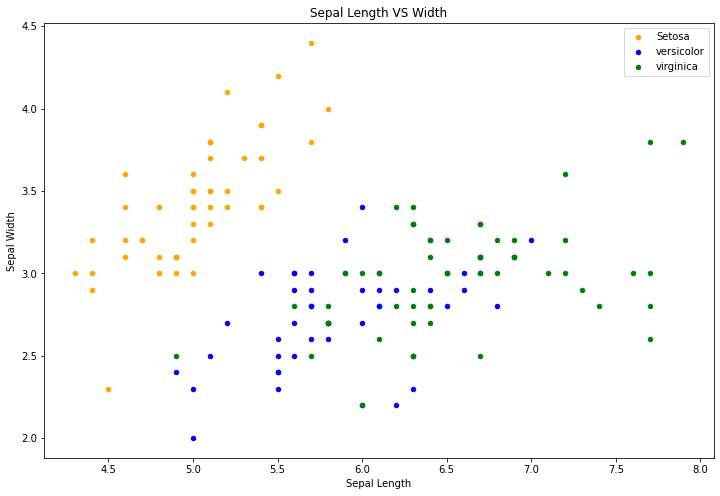

In [81]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Visualización 2: Longitud del sépalo VS Ancho
- Este gráfico muestra la relación entre la longitud y el ancho de los pétalos.

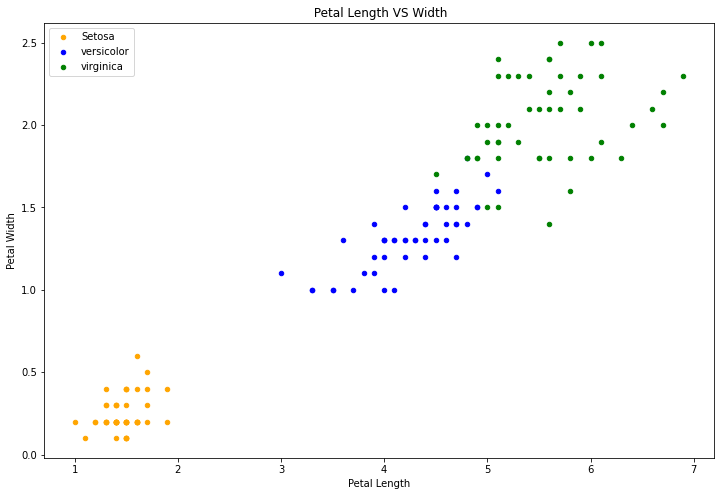

In [84]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='Petal Length',y='Petal Width',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='Petal Length',y='Petal Width',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='Petal Length',y='Petal Width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Como podemos ver, las características de los pétalos ofrecen una mejor división de grupos en comparación con las características de los sépalos. Esta es una indicación de que los Pétalos pueden ayudar en Predicciones mejores y precisas sobre el Sépalo. Lo comprobaremos más tarde.

###MODEL

####**SVM** 

In [15]:

# Se divide la matriz del dataset en dos partes

#X = df.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas

#y = df.iloc[:,4].values
# El vector y contiene los valores de la 4 columna (especie)para todas las filas



In [17]:
from sklearn.model_selection import train_test_split

In [42]:
# Separating the independent variables from dependent variables
x_svm=iris.iloc[:,:-1]
y_svm=iris.iloc[:,4]
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.30)

In [86]:
print("Size of training data: ", len(x_train_svm))
print("Size of test data: ", len(x_test_svm))

Size of training data:  105
Size of test data:  45


In [87]:
print(x_train_svm.shape)
print(y_train_svm.shape)
print(x_test_svm.shape)
print(y_test_svm.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [51]:
y_svm

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

Training and Fitting the model

In [36]:
from sklearn.svm import SVC
model=SVC()

In [43]:
model.fit(x_train_svm, y_train_svm)

SVC()

Predictions from the trained model

In [46]:
pred_svm = model.predict(x_test_svm)

Model Evaluation

In [39]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(confusion_matrix(y_test_svm, pred_svm))

[[14  0  0]
 [ 0 14  1]
 [ 0  3 13]]


In [49]:
print(classification_report(y_test_svm, pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.93      0.81      0.87        16

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.91        45
   weighted avg       0.92      0.91      0.91        45



In [90]:
#sv = svm.SVC() #select the algorithm
#sv.fit(X_train,y_train) # we train the algorithm with the training data and the training output
#y_pred = sv.predict(X_test) #now we pass the testing data to the trained algorithm
#acc_svm = metrics.accuracy_score(y_pred,y_test)
#print('The accuracy of the SVM is:', acc_svm)

###Random Forest


Random Forest es un algoritmo de aprendizaje automático flexible y fácil de usar que produce, incluso sin ajuste de hiperparámetros, un gran resultado la mayor parte del tiempo. También es uno de los algoritmos más utilizados, por su sencillez y por el hecho de que se puede utilizar tanto para tareas de clasificación como de regresión.

In [61]:
#Separating dependent and independent values..
X_rf = iris.iloc[:, :-1].values
X_rf

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
y_rf = iris.iloc[:, -1].values
y_rf

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [53]:
#splitting into training set and test.
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf ,test_size = 0.2, random_state = 123)

In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_rf = sc.fit_transform(X_train_rf)
X_test_rf = sc.transform(X_test_rf)

In [59]:
print("Size of training data: ", len(X_train_rf))
print("Size of test data: ", len(X_test_rf))

Size of training data:  120
Size of test data:  30


In [89]:
print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [55]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_rf, y_train_rf)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [56]:
# Predicting the Test set results
y_pred_rf = classifier.predict(X_test_rf)

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

array([[13,  0,  0],
       [ 0,  5,  1],
       [ 0,  2,  9]])

In [58]:
from sklearn import metrics #for checking the model accuracy
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred_rf, y_test_rf))

The accuracy of the Random forest is: 0.9


###XG Boost

1.0


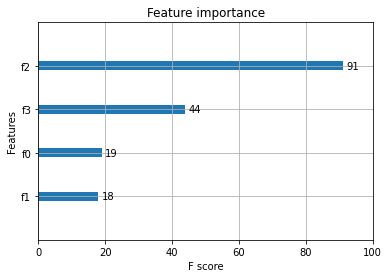

In [98]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score


iris = datasets.load_iris()
X_xg = iris.data
y_xg  = iris.target
X_train_xg , X_test_xg , y_train_xg , y_test_xg  = train_test_split(
   X_xg , y_xg , test_size=0.20, random_state=42
)
dtrain = xgb.DMatrix(X_train_xg , label=y_train_xg )
dtest = xgb.DMatrix(X_test_xg , label=y_test_xg )
parameters = {
   "eta": 0.3,
   "objective": "multi:softprob",  # error evaluation for multiclass tasks
   "num_class": 3,  # number of classes to predic
   "max_depth": 3,  # depth of the trees in the boosting process
}
num_round = 20  # the number of training iterations
bst = xgb.train(parameters, dtrain, num_round)
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print(precision_score(y_test_xg , best_preds, average="macro"))
ax = xgb.plot_importance(bst)
ax.figure.savefig("fi.png")

In [99]:
from sklearn import datasets

iris = datasets.load_iris()
X_boost = iris.data
y_boost = iris.target

In [101]:
#Splitting the arrays into random train and test subsets (80% training, 20% testing)



X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_boost, y_boost, test_size=0.20, random_state=42)

In [102]:
print("Train data length:",len(X_train_boost));
print("Test data length:",len(X_test_boost));

Train data length: 120
Test data length: 30


In [104]:
#Creating the Xgboost DMatrix data format (from the arrays already obtained)

import xgboost as xgb

d_boosttrain = xgb.DMatrix(X_train_boost, label=y_train_boost)
d_boosttest = xgb.DMatrix(X_test_boost, label=y_test_boost)

In [105]:
# Setting some parameters

parameters = {
    'eta': 0.3,  
    'silent': True,  # option for logging
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3,  # number of classes to predic
    'max_depth': 3  # depth of the trees in the boosting process
    }  
num_round = 20  # the number of training iterations

In [106]:
#training the model
bst = xgb.train(parameters, d_boosttrain, num_round)

In [107]:
#resut
preds = bst.predict(d_boosttest)

In [108]:
preds[:5]

array([[0.00563804, 0.97755206, 0.01680986],
       [0.98254657, 0.01395846, 0.00349498],
       [0.00363749, 0.00615226, 0.9902103 ],
       [0.00564738, 0.97917044, 0.0151822 ],
       [0.00540075, 0.93640935, 0.0581899 ]], dtype=float32)

In [109]:
'''
Selecting the column that represents the highest probability 
(note that, for each line, there is 3 columns, indicating the probability for each class)
'''

import numpy as np

best_preds = np.asarray([np.argmax(line) for line in preds])

In [110]:
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [111]:
#calculating the precision

from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))

1.0
